In [0]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
import cv2 as cv2

Using TensorFlow backend.


In [0]:
mnist = input_data.read_data_sets('../data/MNIST_data', one_hot=True)
X, _ = mnist.train.images, mnist.train.labels
encoding_dim = 256

inputs = Input(shape=(784,))                  
h = Dense(encoding_dim, activation='relu')(inputs)                        # encoder model
outputs = Dense(784, activation ='sigmoid')(h)                            # decoder model

model = Model(input=inputs, output=outputs)                               # autoencoder - both encoder and decoder

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [0]:
encoder = Model(input=inputs, output=h)                                     # for latent representation
encoded_imgs = encoder.predict(X)                                           # predicting intermediate outputs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(X, X, batch_size=64, nb_epoch=5)                                # training with input = output


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               201488    
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
55000/55000 [==============================] - 4s 72us/step - loss: 0.0195
Epoch 2/5
55000/55000 [==============================] - 4s 67us/step - loss: 0.0042
Epoch 3/5
55000/55000 [==============================] - 4s 70us/step - loss: 0.0026
Epoch 4/5
55000/55000 [==============================] - 4s 69us/step - loss: 0.0020
Epoch 5/5
55000/55000 [==============================] - 4s 67us/step - loss: 0.0017


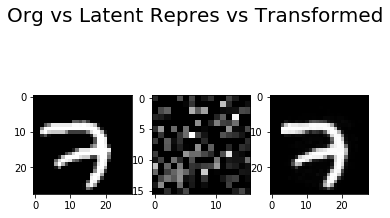

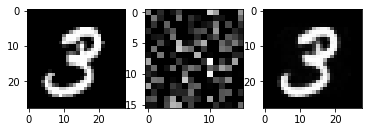

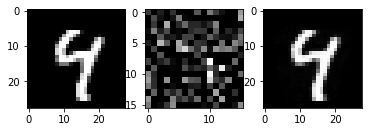

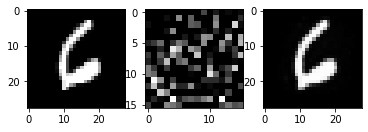

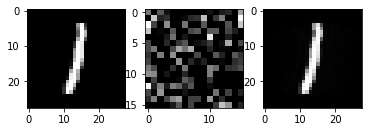

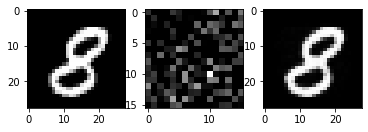

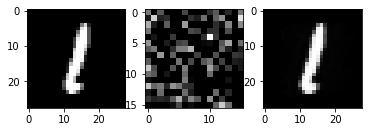

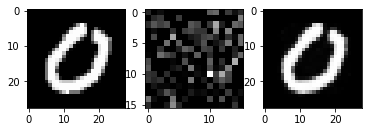

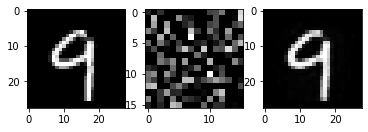

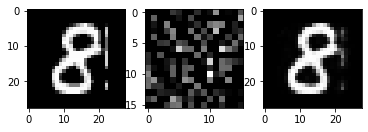

In [0]:
x_pred = model.predict(X)                                                     # predict and display images
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Org vs Latent Repres vs Transformed', fontsize = 20)

for i in range(10):
  plt.subplot(1, 3, 1),plt.imshow(X[i].reshape(28,28), 'gray')
  plt.subplot(1,3,2),plt.imshow(encoded_imgs[i].reshape(16,16), 'gray')
  plt.subplot(1, 3, 3), plt.imshow(x_pred[i].reshape(28,28), 'gray')
  plt.show() 